In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

In [2]:
tickers=['^NSEI','MARUTI.NS','RELIANCE.NS','APOLLOHOSP.NS','KOTAKBANK.NS']

In [3]:
data = pdr.get_data_yahoo(tickers, start="2019-01-01",end=dt.date.today())['Adj Close']

In [4]:
returns = data.pct_change()

In [5]:
data

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Date,,,,,
2019-01-01,NaN,7214.407227,1093.406982,1252.799805,1248.404419
2019-01-02,10792.500000,7012.791016,1079.166260,1245.231934,1238.570557
2019-01-03,10672.250000,6951.133789,1065.852417,1253.047241,1233.229370
2019-01-04,10727.349609,6980.611328,1071.607178,1279.114136,1245.908569
2019-01-07,10771.799805,7103.684082,1077.557007,1268.331177,1244.560669
...,...,...,...,...,...
2022-10-24,17730.750000,8765.450195,2479.850098,4410.149902,1895.800049
2022-10-25,17656.349609,9005.000000,2441.550049,4404.049805,1846.599976
2022-10-27,17736.949219,9041.950195,2451.149902,4431.850098,1865.000000


In [6]:
returns

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,-0.027946,-0.013024,-0.006041,-0.007877
2019-01-03,-0.011142,-0.008792,-0.012337,0.006276,-0.004312
2019-01-04,0.005163,0.004241,0.005399,0.020803,0.010281
2019-01-07,0.004144,0.017631,0.005552,-0.008430,-0.001082
...,...,...,...,...,...
2022-10-24,0.008787,0.007141,0.003338,0.004807,-0.003600
2022-10-25,-0.004196,0.027329,-0.015445,-0.001383,-0.025952
2022-10-27,0.004565,0.004103,0.003932,0.006312,0.009964


In [7]:
mean_daily_ret = data.pct_change(1).mean()
mean_daily_ret

Symbols
^NSEI            0.000629
MARUTI.NS        0.000548
RELIANCE.NS      0.001118
APOLLOHOSP.NS    0.001653
KOTAKBANK.NS     0.000651
dtype: float64

In [8]:
data.pct_change(1).corr()

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Symbols,,,,,
^NSEI,1.000000,0.649881,0.681027,0.418318,0.703105
MARUTI.NS,0.649881,1.000000,0.423302,0.289971,0.432941
RELIANCE.NS,0.681027,0.423302,1.000000,0.247728,0.389519
APOLLOHOSP.NS,0.418318,0.289971,0.247728,1.000000,0.276588
KOTAKBANK.NS,0.703105,0.432941,0.389519,0.276588,1.000000


<AxesSubplot:xlabel='Date'>

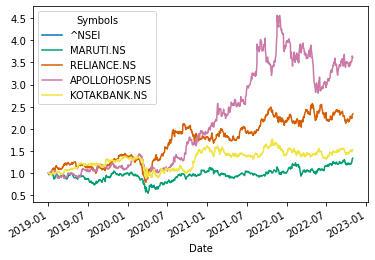

In [9]:
data_normed = data/data.iloc[0]
data_normed.plot()

In [10]:
data_daily_ret = data.pct_change(1)
data_daily_ret

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,-0.027946,-0.013024,-0.006041,-0.007877
2019-01-03,-0.011142,-0.008792,-0.012337,0.006276,-0.004312
2019-01-04,0.005163,0.004241,0.005399,0.020803,0.010281
2019-01-07,0.004144,0.017631,0.005552,-0.008430,-0.001082
...,...,...,...,...,...
2022-10-24,0.008787,0.007141,0.003338,0.004807,-0.003600
2022-10-25,-0.004196,0.027329,-0.015445,-0.001383,-0.025952
2022-10-27,0.004565,0.004103,0.003932,0.006312,0.009964


In [11]:
log_ret = np.log(data/data.shift(1))
log_ret

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,-0.028344,-0.013110,-0.006059,-0.007908
2019-01-03,-0.011205,-0.008831,-0.012414,0.006257,-0.004322
2019-01-04,0.005150,0.004232,0.005385,0.020589,0.010229
2019-01-07,0.004135,0.017477,0.005537,-0.008466,-0.001082
...,...,...,...,...,...
2022-10-24,0.008749,0.007116,0.003332,0.004796,-0.003607
2022-10-25,-0.004205,0.026962,-0.015565,-0.001384,-0.026295
2022-10-27,0.004555,0.004095,0.003924,0.006293,0.009915


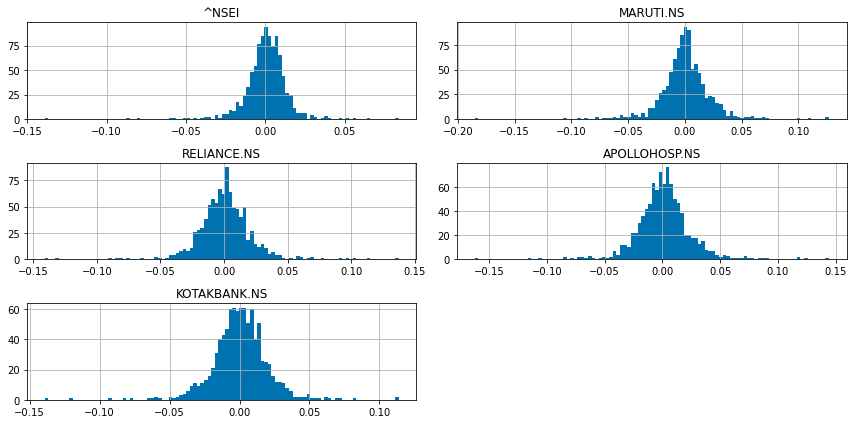

In [12]:
log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout()

In [13]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
^NSEI,941.0,0.000511,0.013429,-0.139038,-0.005173,0.000986,0.007380,0.084003
MARUTI.NS,946.0,0.000307,0.021966,-0.185236,-0.009281,0.000242,0.010241,0.126764
RELIANCE.NS,946.0,0.000898,0.020956,-0.141032,-0.010007,0.000842,0.011563,0.137307
APOLLOHOSP.NS,946.0,0.001358,0.024240,-0.162396,-0.010848,0.000853,0.012407,0.144052
KOTAKBANK.NS,946.0,0.000447,0.020226,-0.139257,-0.009938,0.000450,0.010958,0.113784


In [14]:
log_ret.mean()*252

Symbols
^NSEI            0.128750
MARUTI.NS        0.077349
RELIANCE.NS      0.226199
APOLLOHOSP.NS    0.342101
KOTAKBANK.NS     0.112578
dtype: float64

In [15]:
log_ret.cov()

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Symbols,,,,,
^NSEI,0.000180,0.000193,0.000193,0.000141,0.000193
MARUTI.NS,0.000193,0.000483,0.000196,0.000161,0.000195
RELIANCE.NS,0.000193,0.000196,0.000439,0.000130,0.000167
APOLLOHOSP.NS,0.000141,0.000161,0.000130,0.000588,0.000142
KOTAKBANK.NS,0.000193,0.000195,0.000167,0.000142,0.000409


In [16]:
log_ret.cov()*252

Symbols,^NSEI,MARUTI.NS,RELIANCE.NS,APOLLOHOSP.NS,KOTAKBANK.NS
Symbols,,,,,
^NSEI,0.045445,0.048579,0.048557,0.035644,0.048694
MARUTI.NS,0.048579,0.121595,0.049381,0.040666,0.049074
RELIANCE.NS,0.048557,0.049381,0.110666,0.032737,0.042118
APOLLOHOSP.NS,0.035644,0.040666,0.032737,0.148075,0.035668
KOTAKBANK.NS,0.048694,0.049074,0.042118,0.035668,0.103094


In [17]:
np.random.seed()
print('Stocks :',data.columns)
weights = np.array(np.random.random(5))
print('\nCreating Random Weights :',weights)
weights = weights / np.sum(weights)
print('\nRebalance to sum to 1.0 :',weights)
exp_ret = np.sum(log_ret.mean() * weights) *252
print('\nExpected Portfolio Return :',exp_ret)
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print('\nExpected Volatility :',exp_vol)
sr = exp_ret/exp_vol
print('\nSharpe Ratio :',sr)


Stocks : Index(['^NSEI', 'MARUTI.NS', 'RELIANCE.NS', 'APOLLOHOSP.NS', 'KOTAKBANK.NS'], dtype='object', name='Symbols')

Creating Random Weights : [0.47840227 0.3107802  0.18898249 0.87148663 0.41730722]

Rebalance to sum to 1.0 : [0.21103263 0.13709124 0.08336388 0.38442985 0.1840824 ]

Expected Portfolio Return : 0.2088687674401757

Expected Volatility : 0.2467230277178224

Sharpe Ratio : 0.8465718395733183


In [39]:
num_ports = 1000

all_weights = np.zeros((num_ports,len(data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(5))
    weights = weights / np.sum(weights)    
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [40]:
sharpe_arr.max()

0.9847225562288372

In [41]:
sharpe_arr.argmax()

177

In [42]:
all_weights[sharpe_arr.argmax(),:]

array([0.07858747, 0.0081936 , 0.4040011 , 0.45286681, 0.05635102])

In [43]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

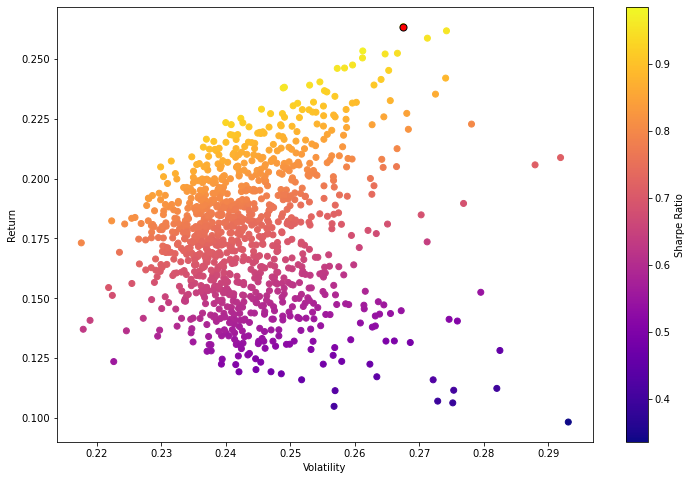

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [45]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [46]:
from scipy.optimize import minimize

In [47]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [48]:
def check_sum(weights):
    return np.sum(weights) - 1

In [49]:
cons = ({'type':'eq','fun': check_sum})

In [50]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1))

In [51]:
init_guess = [0.25,0.25,0.25,0.25,0.25]

In [52]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [53]:
opt_results

     fun: -1.004764027865728
     jac: array([ 0.0441379 ,  0.25871667,  0.00072889, -0.00053491,  0.0675641 ])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.       , 0.       , 0.4232575, 0.5767425, 0.       ])

In [54]:
opt_results.x

array([0.       , 0.       , 0.4232575, 0.5767425, 0.       ])

In [55]:
get_ret_vol_sr(opt_results.x)

array([0.2930448 , 0.29165535, 1.00476403])

In [56]:
frontier_y = np.linspace(0,0.3,100)

In [57]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [58]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

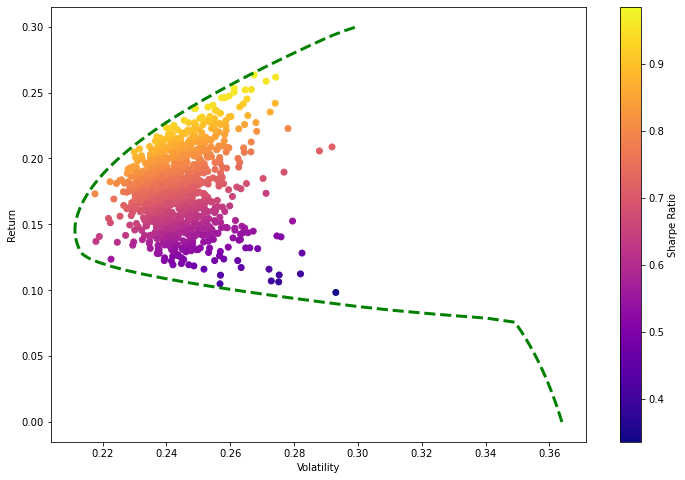

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)